<a href="https://colab.research.google.com/github/kkmayaa/BoneFractureDetection/blob/main/FractureDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from PIL import Image, ImageFile
import os
import matplotlib.pyplot as plt
import numpy as np

dataset_path = '/content/drive/MyDrive/Colab Notebooks/FracAtlas/dataset.csv'

main_data = pd.read_csv(dataset_path)

In [ ]:
new_data = main_data[['image_id', 'fractured']]

**new_data:** copy of main_data with image_id and fractured rows

In [ ]:
image_folder_path = '/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images'
ImageFile.LOAD_TRUNCATED_IMAGES = True

images = []

for image_id in new_data['image_id']:
    image_path = os.path.join(image_folder_path, image_id)
    if os.path.exists(image_path):
            print(image_path)
            image = Image.open(image_path)
            images.append(image)
    else:
            images.append(None)

new_data = new_data.copy()
new_data['image'] = images

/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000000.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000001.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000002.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000003.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000004.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000005.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000006.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000007.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000008.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000009.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000010.jpg
/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images/IMG0000011.jpg
/content/drive/M

In [ ]:
new_data.head()

,image_id,fractured,image
0,IMG0000000.jpg,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,IMG0000001.jpg,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,IMG0000002.jpg,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,IMG0000003.jpg,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,IMG0000004.jpg,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...



**label:** fractured; non-fractured

IMG0000000.jpg


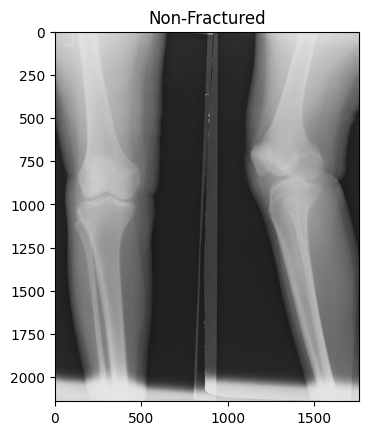

IMG0000001.jpg


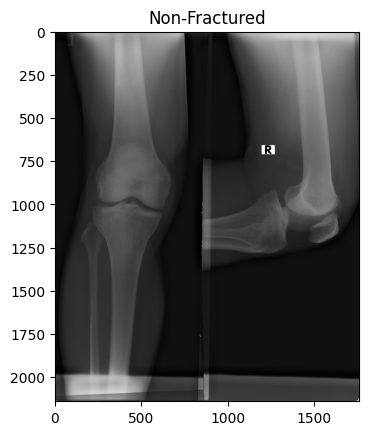

IMG0000002.jpg


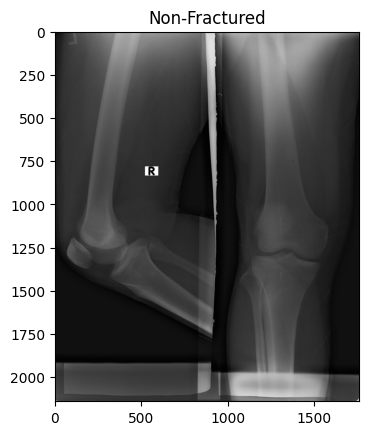

IMG0000003.jpg


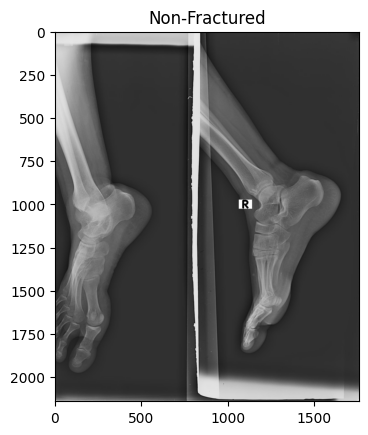

IMG0000004.jpg


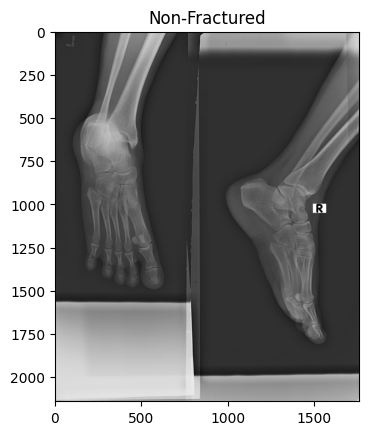

In [ ]:
for index, row in new_data.head().iterrows():
    image = row['image']
    fractured = row['fractured']
    image_id = row['image_id']
    label = 'Fractured' if fractured == 1 else 'Non-Fractured'

    plt.imshow(image)
    plt.title(label)
    print(image_id)
    plt.show()

In [ ]:
X

In [ ]:
y

#Main


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageFile
import os
import pandas as pd
import numpy as np

ImageFile.LOAD_TRUNCATED_IMAGES = True

standard_size = (256, 256)

folder_path = '/content/drive/MyDrive/Colab Notebooks/FracAtlas/images/All_images'

image_data = []
image_names = []

if os.path.exists(folder_path):
    for img_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, img_name)

        try:
            img = Image.open(image_path).convert('RGB')

            img = img.resize(standard_size)

            image_data.append(np.array(img))
            image_names.append(img_name)
        except OSError:
            print(f"Image {img_name} is truncated, skipping.")
        except Exception as e:
            print(f"Failed to read {img_name}: {e}")

    image_names = image_names[:4083]
    image_data = image_data[:4083]
    df_images = pd.DataFrame({'Image Name': image_names, 'Image Data': image_data})
else:
    print("The specified folder path does not exist.")


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FracAtlas/dataset.csv')
labels = df['fractured'].to_numpy()

In [ ]:
df_labels = pd.DataFrame({
    'Image Name': image_names,
    'Label': labels
})

df_combined = pd.merge(df_images, df_labels, on='Image Name')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer with 25% dropout rate

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

X = np.array(df_combined['Image Data'].tolist()) / 255.0
y = np.array(df_combined['Label'].tolist())

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
          epochs=10,
          validation_data=(X_test, y_test))


Epoch 1/10
52/52 [==============================] - 59s 902ms/step - loss: 0.6636 - accuracy: 0.8034 - val_loss: 0.5059 - val_accuracy: 0.8237
Epoch 2/10
52/52 [==============================] - 47s 902ms/step - loss: 0.4999 - accuracy: 0.8249 - val_loss: 0.4824 - val_accuracy: 0.8237
Epoch 3/10
52/52 [==============================] - 47s 897ms/step - loss: 0.4879 - accuracy: 0.8249 - val_loss: 0.4758 - val_accuracy: 0.8237
Epoch 4/10
52/52 [==============================] - 47s 904ms/step - loss: 0.4826 - accuracy: 0.8249 - val_loss: 0.4854 - val_accuracy: 0.8237
Epoch 5/10
52/52 [==============================] - 46s 892ms/step - loss: 0.4790 - accuracy: 0.8249 - val_loss: 0.4718 - val_accuracy: 0.8237
Epoch 6/10
52/52 [==============================] - 47s 900ms/step - loss: 0.4820 - accuracy: 0.8249 - val_loss: 0.4897 - val_accuracy: 0.8237
Epoch 7/10
52/52 [==============================] - 46s 885ms/step - loss: 0.4763 - accuracy: 0.8249 - val_loss: 0.4777 - val_accuracy: 0.8237

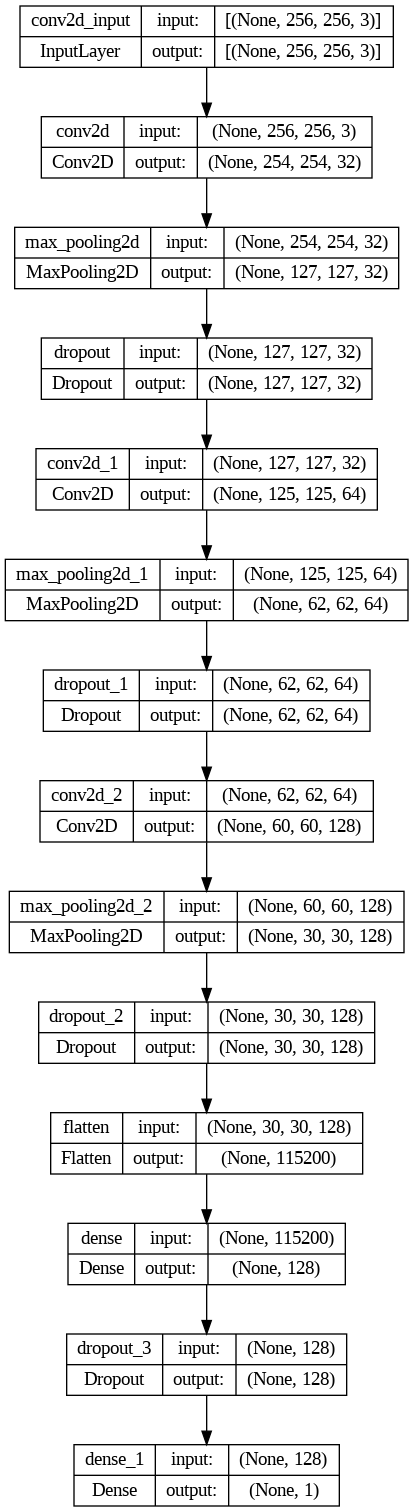

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/FracAtlas/dataset.csv'

main_data = pd.read_csv(dataset_path)
new_data = main_data[['image_id', 'fractured']]

1/1 [==============================] - 0s 21ms/step
Raw output (probability): 0.17600293457508087
Predicted label: 0, Actual label: 0.0
Shape of X_test[index]: (256, 256, 3)


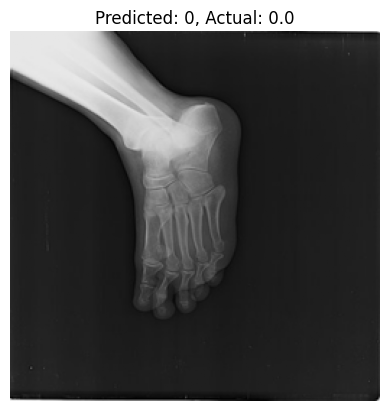

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
index = 10

single_sample = np.expand_dims(X_test[index], axis=0)

prediction = model.predict(single_sample)

predicted_label = (prediction > 0.5).astype('int32')[0][0]

actual_label = y_test[index]

print(f"Raw output (probability): {prediction[0][0]}")
print(f"Predicted label: {predicted_label}, Actual label: {actual_label}")

sample_shape = X_test[index].shape
print("Shape of X_test[index]:", sample_shape)


if len(sample_shape) == 3 and sample_shape[-1] == 1:
    plt.imshow(X_test[index].squeeze(), cmap='gray')
elif len(sample_shape) == 3 and sample_shape[-1] == 3:
    plt.imshow(X_test[index])
elif len(sample_shape) == 2:
    plt.imshow(X_test[index], cmap='gray')

plt.title(f'Predicted: {predicted_label}, Actual: {actual_label}')
plt.axis('off')

plt.show()


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/FractureDetectionModel", save_format="tf")
